In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import scipy.stats
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [200]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding = 'unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [201]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [203]:
#shape of data
df.shape

(2823, 25)

**Data cleaning**
We have some unnecessary columns such as „ADDRESSLINE1”, „ADDRESSLINE2”, „POSTALCODE”, „TERRITORY”, „PHONE” and we remove them. We also can regroup the column 'PRODUCTINITIAL' use only three first signs.

In [204]:
#remove columns
data=['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY', 'PHONE', 'CITY' , 'STATE','CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'MONTH_ID']
df.drop(data,axis=1,inplace=True)

In [205]:

# Regrouping product code.
df['PRODUCTINITIAL'] = df['PRODUCTCODE'].str[:3]
df.drop('PRODUCTCODE',axis=1,inplace=True)

In [206]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,2004,Ships,54,Euro Shopping Channel,Spain,Small,S72
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,2005,Ships,54,"Oulu Toy Supplies, Inc.",Finland,Medium,S72
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,2005,Ships,54,Euro Shopping Channel,Spain,Medium,S72
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,2005,Ships,54,Alpha Cognac,France,Small,S72
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,2005,Ships,54,Gifts4AllAges.com,USA,Medium,S72


In [207]:
df2 = df
df2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,S10
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,2003,Motorcycles,95,Reims Collectables,France,Small,S10
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,2003,Motorcycles,95,Lyon Souveniers,France,Medium,S10
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,S10
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,S10


**Data Exploration**
Checking null values:

In [208]:
df2.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
PRODUCTINITIAL     0
dtype: int64

In [209]:
#checking unique values
df2.nunique()

ORDERNUMBER         307
QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
CUSTOMERNAME         92
COUNTRY              19
DEALSIZE              3
PRODUCTINITIAL        8
dtype: int64

In [210]:
# checking unique years
df2['YEAR_ID'].unique()

array([2003, 2004, 2005])

**Data visualization**
Let's plot the data to get more insight:

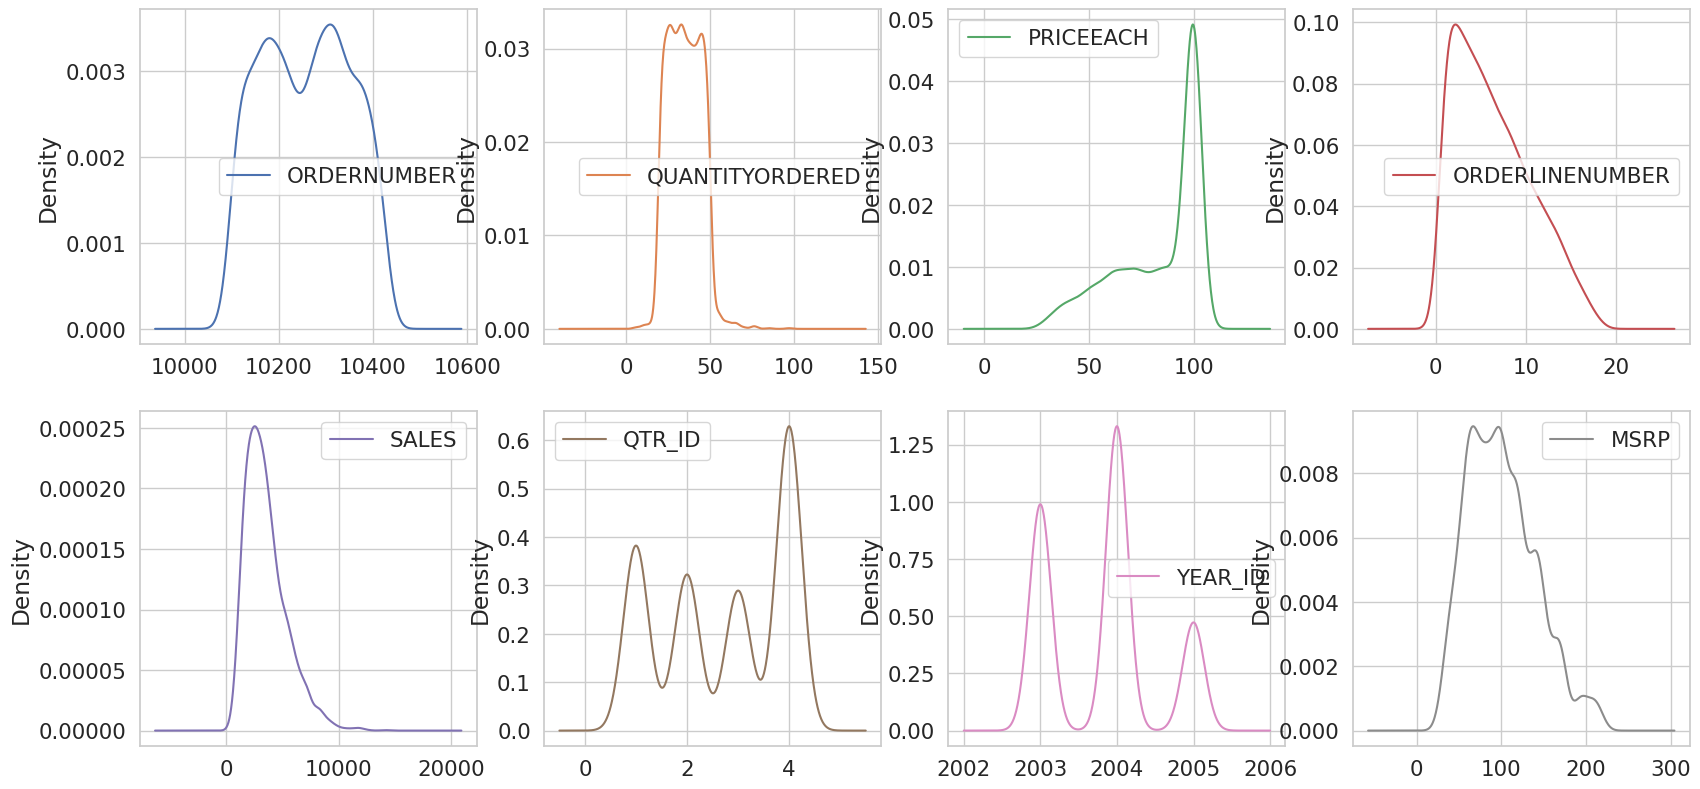

In [212]:
plt.rcParams['figure.figsize'] = [20, 20]
df2.plot(kind="density", subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

Majority of the data comes from 2003 and 2004 years (YEAR_ID). According to the data, most of the sales are within a certain price range. But we have a few outliers for "SALES" and "QUANTITYORDERED". We have skewed variables like "PRICEEACH", "ORDERLINENUMBER". We have also variables with a large discrepancy such as "PRICEEACH", "ORDERLINENUMBER", and "MSRP".

In [214]:
df2['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

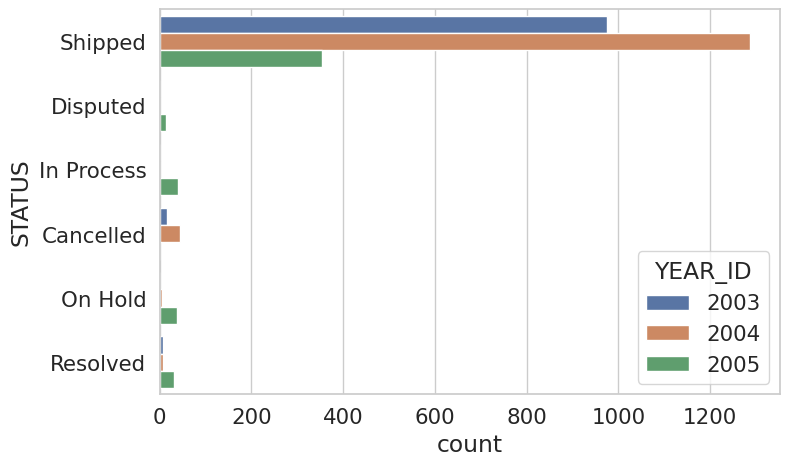

In [215]:
plt.rcParams['figure.figsize'] = [8, 5]
sns.countplot(y='STATUS',data=df2,hue='YEAR_ID', );

Comparing Sales for each year:

In [216]:
df2.groupby(['YEAR_ID'])['SALES'].sum()

YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64

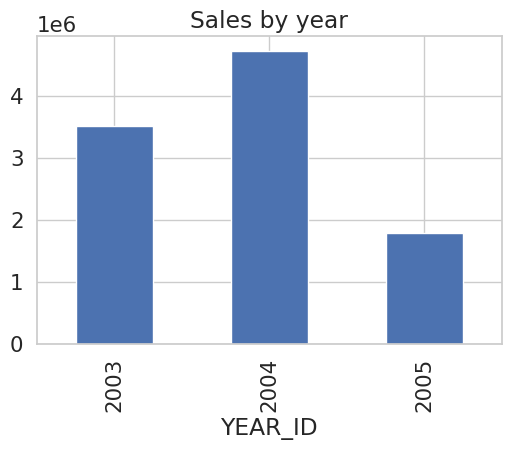

In [217]:
df2.groupby(['YEAR_ID'])['SALES'].sum().plot(kind='bar', figsize=(6,4), title='Sales by year');

The most sales were recorded in 2004 compared to 2003. We do not have all the data for 2005.

Comparing sales for each year(Quaterwise):

In [218]:
sales = df2.groupby(['YEAR_ID','QTR_ID']).agg({'SALES': lambda x: x.sum()})
sales

SALES
YEAR_ID QTR_ID            
2003    1        445094.69
        2        562365.22
        3        649514.54
        4       1860005.09
2004    1        833730.68
        2        766260.73
        3       1109396.27
        4       2014774.92
2005    1       1071992.36
        2        719494.35

In [219]:
sales.reset_index(inplace=True)
sales.head()

,YEAR_ID,QTR_ID,SALES
0,2003,1,445094.69
1,2003,2,562365.22
2,2003,3,649514.54
3,2003,4,1860005.09
4,2004,1,833730.68


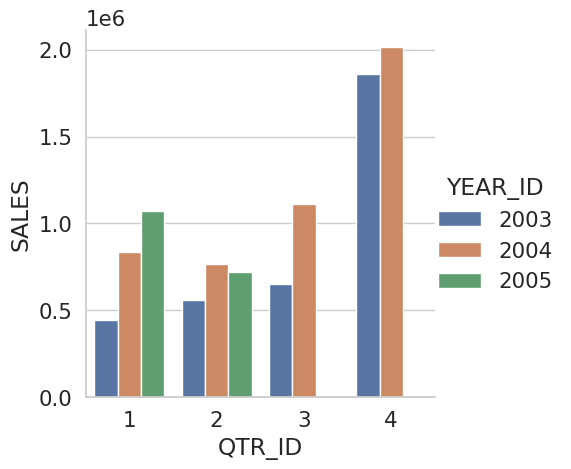

In [220]:
sns.catplot(y='SALES', x='QTR_ID',data=sales,kind="bar" ,hue='YEAR_ID');

**RFM Analysis**

For RFM analysis, we need only four columns: 'CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE' and 'SALES'.

In [221]:
col =['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM = df2[col]
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2/24/2003 0:00,2871.00
1,Reims Collectables,10121,5/7/2003 0:00,2765.90
2,Lyon Souveniers,10134,7/1/2003 0:00,3884.34
3,Toys4GrownUps.com,10145,8/25/2003 0:00,3746.70
4,Corporate Gift Ideas Co.,10159,10/10/2003 0:00,5205.27


In [222]:
RFM.shape

(2823, 4)

In RFM clustering, it is usually assumed that only operations from the last 12 months are taken into account. The reason for this is simple: older operations can say little about the current situation of the seller, buyer, and the product itself. In order to set them, you need to adopt an agreed date for the grouping. In our data for "today" I will assume the day of the newest operation in the set.

In [223]:
RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')

<ipython-input-223-e93d32424d64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')


In [224]:
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2003-02-24,2871.00
1,Reims Collectables,10121,2003-05-07,2765.90
2,Lyon Souveniers,10134,2003-07-01,3884.34
3,Toys4GrownUps.com,10145,2003-08-25,3746.70
4,Corporate Gift Ideas Co.,10159,2003-10-10,5205.27


In [225]:
RFM['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [226]:
now = dt.datetime(2005,5,31)

**Create the RFM Table:**

Calculation of the "Recency" variable - information about how long ago the customer was shopping in the store:
Recency: It measures the time elapsed since the customer's last interaction or purchase. The recency value represents the number of days between a specific reference point (such as the current date or a fixed date) and the customer's most recent activity.

In [230]:
rfm_df = RFM.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now - x.max()).days})
rfm_df

,ORDERDATE
CUSTOMERNAME,
"AV Stores, Co.",195
Alpha Cognac,64
Amica Models & Co.,264
"Anna's Decorations, Ltd",83
Atelier graphique,187
...,...
"Vida Sport, Ltd",274
Vitachrome Inc.,207
"Volvo Model Replicas, Co",193


Frequency: It quantifies how often a customer engages or purchases from the business within a defined period. Frequency is typically calculated as the total number of interactions or transactions made by the customer during a specific timeframe.

Monetary: It represents the value or amount of money a customer has spent on purchases during a given period. It measures the customer's overall spending or contribution to the business.

In [231]:
rfm_df['Frequency'] = RFM.groupby(by=['CUSTOMERNAME'])['ORDERNUMBER'].count()

In [232]:
rfm_df['MonetaryValue'] = RFM.groupby(by='CUSTOMERNAME').agg({'SALES': 'sum'})

In [233]:
rfm_df.head()

,ORDERDATE,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


In [234]:
rfm_df.rename(columns={'ORDERDATE': 'Recency'}, inplace=True)
rfm_df.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


**Model: RFM scoring + K-Means clustering**

In this approach we used RFM scoring(assigned RFM score) and K-means clustering.

**Transformation of variables:**

The next step is to transform all three variables. The RFM method requires ordinal variables and this can be done in several ways, we will use the percentiles of the distribution of the given variable. Scaling is not required.

The labels will be values 1-4. When labeling the values of variables, it is important to remember that the higher label should mean the better situation of the person from the point of view of the seller. **In the case of "Recency" - the smaller value of the variable, the higher label (we prefer clients who are active).\\** **In the case of "Frequency" - the greater value of the variable**, **the higher label (we prefer customers who buy more often and for large amounts).**

In [235]:
r = pd.qcut(rfm_df.Recency, 4, labels = list(range(0,4)))

In [236]:
f = pd.qcut(rfm_df.Frequency, 4, labels = list(range(0,4)))

In [237]:
m = pd.qcut(rfm_df.MonetaryValue, 4, labels = list(range(0,4)))

In [238]:
rfm_df_cutted = pd.DataFrame({'Recency' : r, 'Frequency' : f, 'MonetaryValue' : m})
rfm_df_cutted

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",2,3,3
Alpha Cognac,0,1,1
Amica Models & Co.,3,1,2
"Anna's Decorations, Ltd",1,3,3
Atelier graphique,2,0,0
...,...,...,...
"Vida Sport, Ltd",3,2,2
Vitachrome Inc.,2,1,2
"Volvo Model Replicas, Co",2,0,1


In [239]:
rfm_df_raw = rfm_df_cutted.values
rfm_df_raw

array([[2, 3, 3],
       [0, 1, 1],
       [3, 1, 2],
       [1, 3, 3],
       [2, 0, 0],
       [0, 1, 0],
       [1, 3, 3],
       [1, 0, 0],
       [3, 0, 0],
       [0, 2, 2],
       [1, 0, 0],
       [2, 2, 2],
       [3, 0, 0],
       [2, 1, 1],
       [1, 0, 0],
       [3, 0, 0],
       [3, 0, 0],
       [2, 1, 1],
       [2, 1, 0],
       [2, 1, 1],
       [3, 0, 0],
       [3, 1, 2],
       [1, 1, 1],
       [1, 3, 3],
       [2, 2, 3],
       [2, 1, 2],
       [3, 1, 0],
       [0, 3, 3],
       [0, 2, 3],
       [3, 0, 1],
       [3, 0, 0],
       [1, 3, 3],
       [2, 1, 1],
       [0, 3, 3],
       [1, 1, 2],
       [0, 1, 2],
       [1, 0, 0],
       [0, 1, 1],
       [0, 3, 2],
       [2, 2, 2],
       [3, 2, 2],
       [3, 0, 0],
       [0, 3, 3],
       [2, 1, 2],
       [0, 3, 3],
       [2, 3, 3],
       [0, 1, 1],
       [1, 1, 1],
       [3, 2, 2],
       [3, 0, 0],
       [2, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [2, 1, 1],
       [1, 3, 2],
       [0,

**K-Means clustering model**:
K-means is an unsupervised machine learning algorithm, which is used for data clustering. In k-means algorithm number of clusters K is predetermined and the algorithm iteratively assigns each data point to one of the K clusters based on the feature similarity.

We will find the optimal number of clusters using the elbow method:

In [240]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_df_raw)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [241]:
groups

,number_of_group,inertia
0,1,344.304348
1,2,159.730326
2,3,107.023375
3,4,77.847931
4,5,60.647687
5,6,48.455400
6,7,38.821451
7,8,32.101754
8,9,28.208911
9,10,24.474747


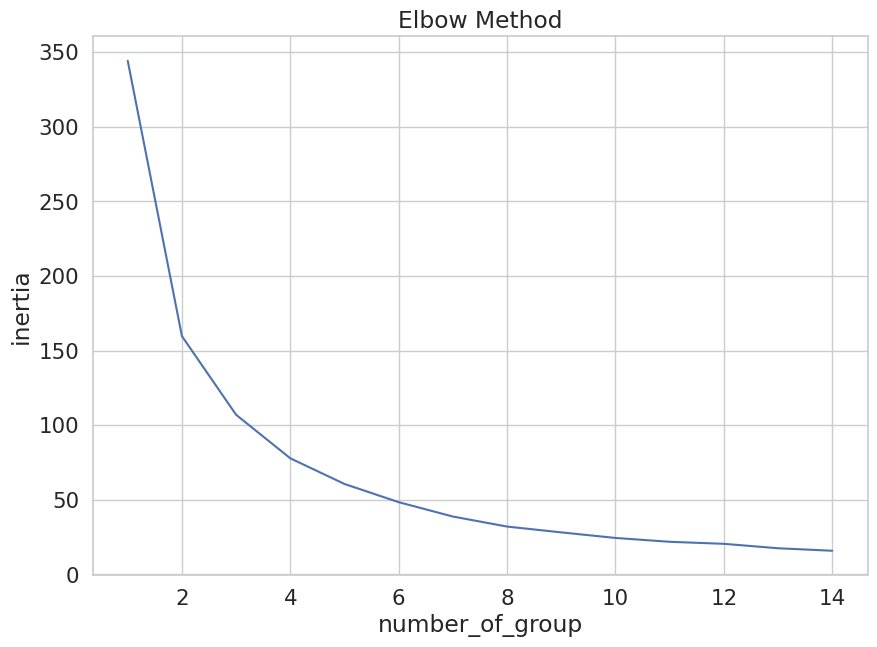

In [242]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number_of_group', y = 'inertia').set(title = "Elbow Method")
plt.show()

Based on the Elbow plot, we could choose 4 and 6. We will test both of them.

The function of visualize grouping

In [243]:
def plots_model():
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    for x in rfm_df.groups.unique():
        xs = rfm_df[rfm_df.groups == x]['Recency']
        zs = rfm_df[rfm_df.groups == x]['Frequency']
        ys = rfm_df[rfm_df.groups == x]['MonetaryValue']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label = x)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('MonetaryValue')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

In [252]:
model_1 = KMeans(n_clusters=6, init='k-means++', max_iter=300)
groups = model_1.fit_predict(rfm_df_raw)
rfm_df_cutted['groups'] = groups
rfm_df['groups'] = groups

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


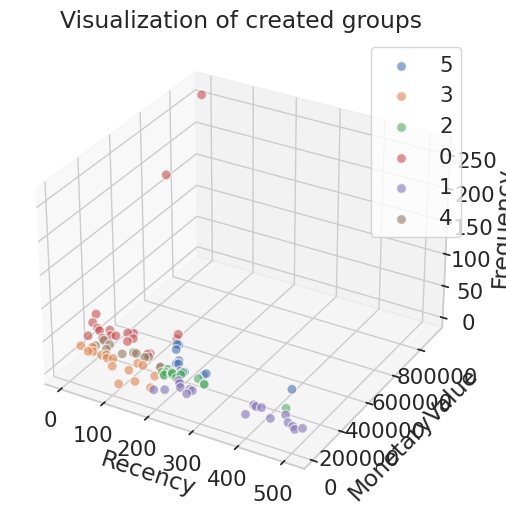

In [253]:
plots_model()

In [254]:
print((rfm_df.groups.value_counts(normalize = True, sort = True) * 100).to_string())

0    20.652174
1    19.565217
2    18.478261
3    17.391304
5    11.956522
4    11.956522


Statistics for the whole set:

In [255]:
rfm_df.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,181.826087,30.684783,109050.313587,2.163043


In [256]:
rfm_df.groupby('groups').agg(['mean'])


,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,65.157895,60.052632,216240.730526
1,351.944444,14.944444,52639.097778
2,231.823529,23.705882,84080.025882
3,88.000000,18.312500,62768.398125
4,103.454545,28.727273,103478.149091
5,242.545455,36.454545,127694.250909


The sum of the values for each group:

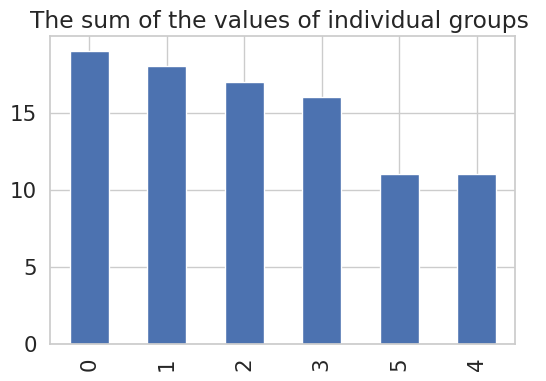

In [257]:
rfm_df.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups ');

In [269]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups,SegmentName
CUSTOMERNAME,,,,,
"AV Stores, Co.",195,51,157807.81,0,departing
Alpha Cognac,64,20,70488.44,2,inactive
Amica Models & Co.,264,26,94117.26,1,active
"Anna's Decorations, Ltd",83,46,153996.13,0,departing
Atelier graphique,187,7,24179.96,3,new


In [258]:
model_1 = KMeans(n_clusters=4, init='k-means++', max_iter=300)
groups = model_1.fit_predict(rfm_df_raw)
rfm_df['groups'] = groups

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


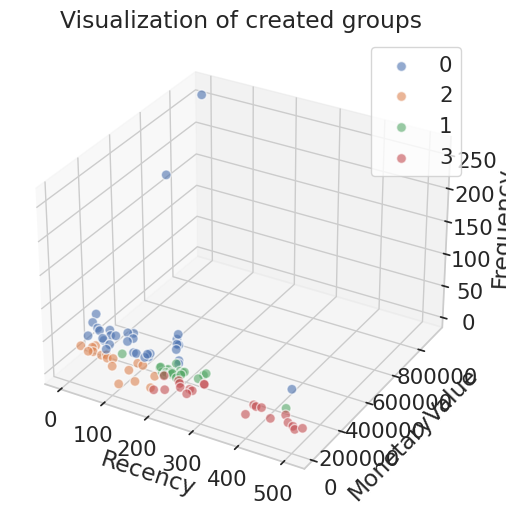

In [259]:
plots_model()

In [260]:
print((rfm_df.groups.value_counts(normalize = True, sort = True) * 100).to_string())

0    34.782609
1    23.913043
3    22.826087
2    18.478261


In [262]:
rfm_df.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,181.826087,30.684783,109050.313587,1.293478


In [263]:
rfm_df.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,105.156250,50.187500,179045.850625
1,219.727273,25.500000,91811.579545
2,84.352941,18.705882,65069.950588
3,337.857143,16.095238,56053.224762


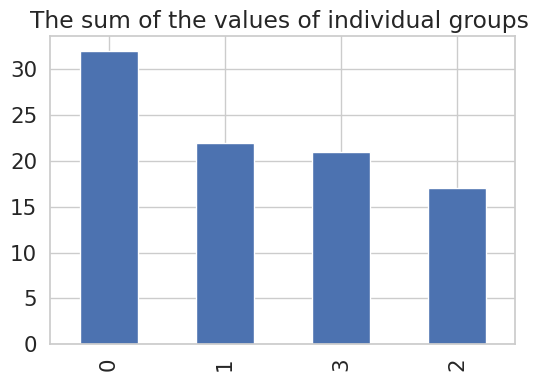

In [264]:
rfm_df.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups ');

In [265]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups
CUSTOMERNAME,,,,
"AV Stores, Co.",195,51,157807.81,0
Alpha Cognac,64,20,70488.44,2
Amica Models & Co.,264,26,94117.26,1
"Anna's Decorations, Ltd",83,46,153996.13,0
Atelier graphique,187,7,24179.96,3


In [266]:
#function to assigned segment name to each value
def name(row):
    if row == 0:
        return 'departing'
    elif row == 1:
        return 'active'
    elif row == 2:
        return 'inactive'
    else:
        return 'new'

In [267]:
rfm_df['SegmentName'] = rfm_df['groups'].apply(name)


In [268]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups,SegmentName
CUSTOMERNAME,,,,,
"AV Stores, Co.",195,51,157807.81,0,departing
Alpha Cognac,64,20,70488.44,2,inactive
Amica Models & Co.,264,26,94117.26,1,active
"Anna's Decorations, Ltd",83,46,153996.13,0,departing
Atelier graphique,187,7,24179.96,3,new


**Description of the results**
Interpretation of the resulting groups:

**We chose segmentation for four groups. We may interpret them as the following customer segments:**

Group 0: Customers who were shopping for a long time, buy moderately often and they shop for high amounts.
Group 1: Customers who have been shopping recently, they buy often and make purchases for large amounts.
Group 2: Customers who have not been buying anything for a long time, they rarely buy and make purchases for relatively small amounts.
Group 3: Customers who have been shopping recently, they rarely buy and make purchases for relatively small amounts.
**Based on the received groups we can name them as follows:**

Group 0 - former best customers - **departing,**
Group 1 - best customers - **active,**
Group 2 - old and random customers - **inactive**,
Group 3 - new and random customers - **new.**
Marketing strategies for the customer segments

Based on the 4 clusters, we could formulate marketing strategies relevant to each group:

For the groups 1 and 3 we can apply a typical promotional strategy would focus certain efforts for the high value customers. For the best customers example actions may it be: special offers with discounts, customer cards entitling to benefits (e.g. collecting points redeemed for rewards) or a gift for the next order.

The new clients have not bought from our store before, that's why is worth fighting to transform them into best clients. Example actions for them are: e-mail marketing presenting the advantages of our products, special offers, with discounts for appropriately large purchases.

For the groups 0 and 2 i.e. former best customers and old clients we also can adopt certain marketing strategy. In group 0 (former best clients) include a big customers who for some reason have stopped buying our products, then it is worth trying to renew relations with them hrough an conduct marketing campaign. The group 2 is an old and random customers and here is worth to considering whether we want to carry out some marketing activities.